# Project 1- Dr. Semmelweis and the Discovery of Handwashing

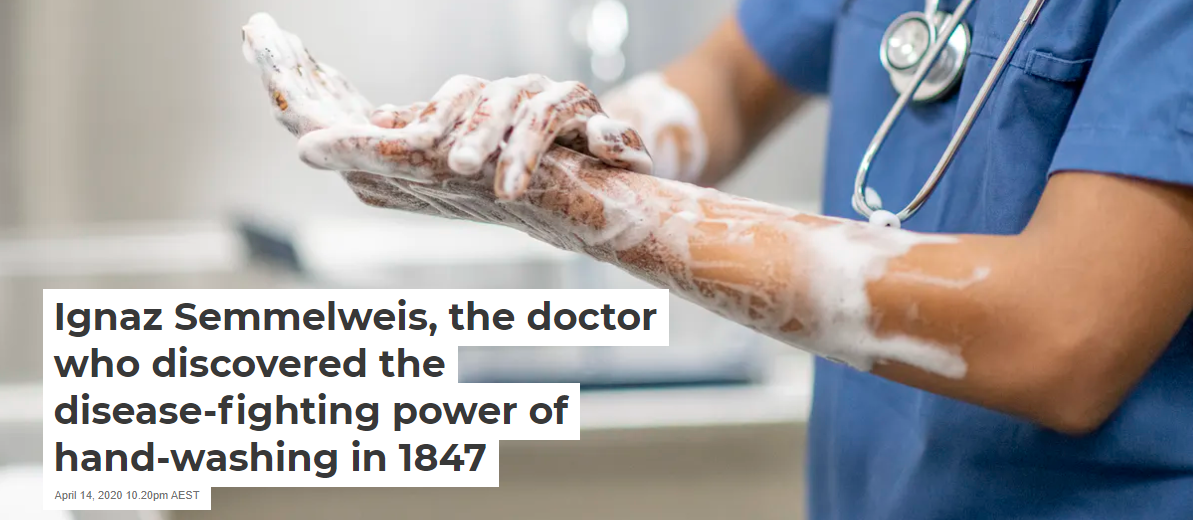

# Project Description
In 1847, the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.

<b>Childbed fever: A major cause of maternal mortality</b>
     Ignaz Semmelweis is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!
     
     In this notebook we will reanalyze the medical data Semmelweis collected.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
yearly_data = pd.read_csv("yearly_deaths_by_clinic.csv")

In [106]:
yearly_data.head(10)

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


# 1. The alarming number of deaths
The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

In [4]:
yearly_data.tail()

,year,births,deaths,clinic
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [5]:
yearly_data.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [6]:
yearly_data.shape

(12, 4)

In [7]:
yearly_data.dtypes

year       int64
births     int64
deaths     int64
clinic    object
dtype: object

In [8]:
yearly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [9]:
yearly_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,12.0,1843.500000,1.783765,1841.0,1842.00,1843.5,1845.00,1846.0
births,12.0,3152.750000,449.078476,2442.0,2901.75,3108.5,3338.25,4010.0
deaths,12.0,223.333333,145.383089,66.0,100.25,219.5,263.50,518.0


In [10]:
yearly_data['clinic'].value_counts()

clinic 1    6
clinic 2    6
Name: clinic, dtype: int64

###### Lets understand the data by performing EDA

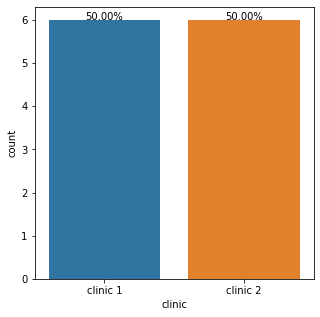

In [11]:
size = (5,5)
#Number of reocrds in clinic 1 and 2 in Percentanges
plt.figure(figsize=size)
ax = sns.countplot(yearly_data['clinic'])
total = len(yearly_data)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
            height,
            '{:.2f}%'.format(height/total*100),
            ha="center") 
plt.show()

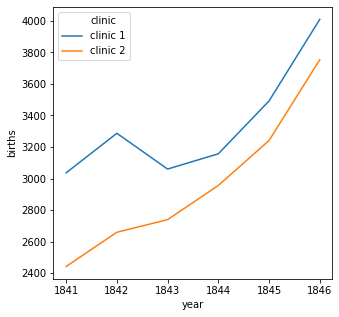

In [12]:
#Lets explore the data by using line plot
plt.figure(figsize=size)
sns.lineplot(x='year',y='births',dashes=True,hue='clinic',data=yearly_data)
plt.show()

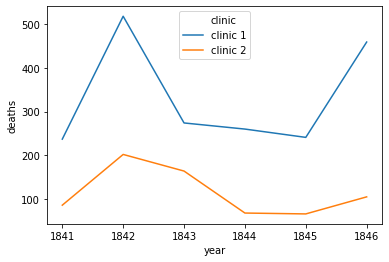

In [13]:
sns.lineplot(x='year',y='deaths',dashes=True,hue='clinic',data=yearly_data)
plt.show()

# 2. Death at the clinics
when we observe the graph above, Deaths in clinic 1 and clinic 2 we'll see a curious pattern...

###### step 1. Lets calculate the yearly proportion of deaths per number of births

In [14]:
print(100 * yearly_data["deaths"].sum() / yearly_data["births"].sum())

7.083762852536146


In [15]:
print(yearly_data["deaths"]/ yearly_data["births"])

0     0.078063
1     0.157591
2     0.089542
3     0.082357
4     0.069015
5     0.114464
6     0.035217
7     0.075968
8     0.059876
9     0.023004
10    0.020364
11    0.027970
dtype: float64


In [16]:
#Lets create new column,and take the proportion
yearly_data["proportion_deaths"] = (yearly_data["deaths"]/ yearly_data["births"])
yearly_data

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


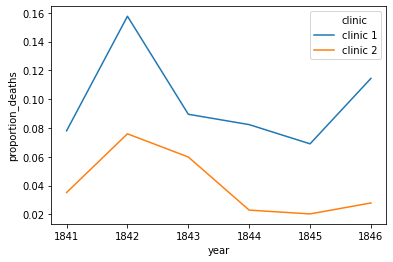

In [17]:
sns.lineplot(x='year',y='proportion_deaths',dashes=True,hue='clinic',data=yearly_data)
plt.show()

###### step 2. Lets make subset of clinic1 and clinic2

In [18]:
yearly1 = yearly_data[(yearly_data["clinic"]=='clinic 1')]
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [19]:
yearly2 = yearly_data[(yearly_data["clinic"]=='clinic 2')]
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


###### step 3. Lets plot the both yearly1 and yearly2 with there respective proportions

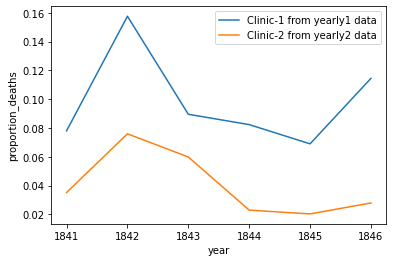

In [20]:
sns.lineplot(x='year',y='proportion_deaths',dashes=True,label=str("Clinic-1 from yearly1 data"),data=yearly1)
sns.lineplot(x='year',y='proportion_deaths',dashes=True,label=str("Clinic-2 from yearly2 data"),data=yearly2)
plt.show()

#ax = yearly1.plot(x="year", y="proportion_deaths",label="yearly1")
#yearly2.plot(x="year", y="proportion_deaths",label="yearly2", ax=ax)
#ax.set_ylabel("proportion_deaths")

# 3. The handwashing begins
Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.

Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.

###### step 4. Lets load monthly dataset

In [21]:
monthly_data = pd.read_csv("monthly_deaths.csv",parse_dates=["date"])

In [22]:
monthly_data.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [23]:
monthly_data.tail()

,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


In [24]:
monthly_data.columns

Index(['date', 'births', 'deaths'], dtype='object')

In [25]:
monthly_data.shape

(98, 3)

In [26]:
monthly_data.dtypes

date      datetime64[ns]
births             int64
deaths             int64
dtype: object

In [27]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [28]:
monthly_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
births,98.0,267.000000,41.769372,190.0,242.5,264.0,292.75,406.0
deaths,98.0,22.469388,18.141031,0.0,8.0,16.5,36.75,75.0


###### step.5 Lets Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"]

In [29]:
#Lets create new column,and take the proportion
monthly_data["proportion_deaths"] = (monthly_data["deaths"]/ monthly_data["births"])
monthly_data

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [30]:
yearly_data

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


###### step.6 Plot the monthly proportion of deaths for Clinic 1.

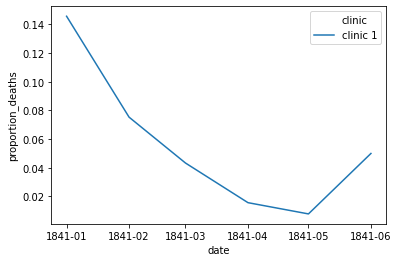

In [31]:
sns.lineplot(x='date',y='proportion_deaths',dashes=True,hue=yearly1["clinic"],data = monthly_data)
plt.show()

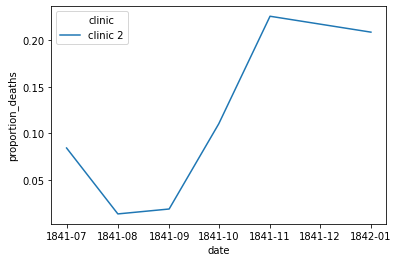

In [32]:
sns.lineplot(x='date',y='proportion_deaths',dashes=True,hue=yearly2["clinic"],data = monthly_data)
plt.show()

As per the project description, Handwash invented in the year of 1847 by Hungarian physician Ignaz Semmelweis

###### step.7. Lets check childrens death before and after the invention of Handwash

In [38]:
before_washing = monthly_data[(monthly_data['date']<'1847')]
before_washing

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
66,1846-08-01,216,39,0.180556
67,1846-09-01,271,39,0.143911
68,1846-10-01,254,38,0.149606
69,1846-11-01,297,32,0.107744


In [36]:
#proportions of death to birth before inventing the handwash
before_washing = monthly_data[(monthly_data['date']<'1847')]
before_washing

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


In [56]:
before_washing.shape

(71, 4)

In [39]:
#proportions of death to birth after inventing the handwash
after_washing = monthly_data[(monthly_data['date']>='1847')]
after_washing

,date,births,deaths,proportion_deaths
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231
73,1847-03-01,305,11,0.036066
74,1847-04-01,312,57,0.182692
75,1847-05-01,294,36,0.122449
76,1847-06-01,268,6,0.022388
77,1847-07-01,250,3,0.012000
78,1847-08-01,264,5,0.018939
79,1847-09-01,262,12,0.045802
80,1847-10-01,278,11,0.039568


In [57]:
after_washing.shape

(27, 4)

# 4. The effect of handwashing

before and after

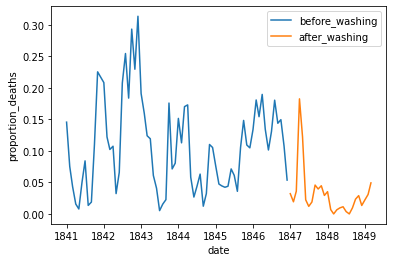

In [41]:
sns.lineplot(x='date',y='proportion_deaths',dashes=True,label=str("before_washing"),data = before_washing)
sns.lineplot(x='date',y='proportion_deaths',dashes=True,label=str("after_washing"),data = after_washing)
plt.show()

# 6. More handwashing, fewer deaths?

###### step.8. Lets Calculate the average reduction in proportion of deaths due to handwashing.

In [54]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
print("before_proportion: ",before_proportion.mean())
print("after_proportion : ",after_proportion.mean())
print("difference in the mean of before_proportion and after proportion is : ",(after_proportion.mean()-before_proportion.mean()))

before_proportion:  0.10691840432632767
after_proportion :  0.031727637898556225
difference in the mean of before_proportion and after proportion is :  -0.07519076642777145


# 7. A Bootstrap analysis of Semmelweis handwashing data

###### step.8. Lets Make a bootstrap analysis of the difference in mean monthly proportion of deaths.

Bootstrap sample  [Bootstrap-Sampling-Technique](http://datasciencechalktalk.com/2019/11/12/bootstrap-sampling-an-implementation-with-python/)

In [83]:
#from sklearn.utils import resample
#boot_before = resample(before_proportion,replace=True,n_samples=3000)
#boot_after = resample(after_proportion,replace=True,n_samples=3000)
#boot_mean_diff = []
#for i in range(3000):
    #boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [92]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac = 1, replace = True)
    boot_after = after_proportion.sample(frac = 1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

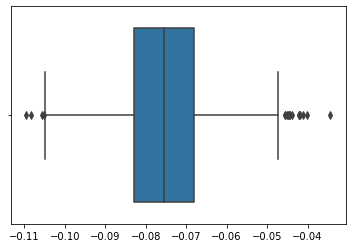

In [93]:
#boot_mean_diff
sns.boxplot(boot_mean_diff)
plt.show()

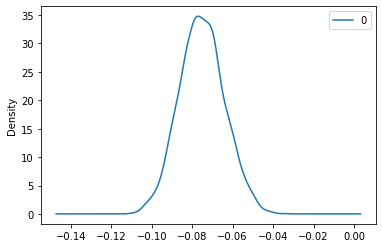

In [102]:
# lets plot KDE
boot_mean_diff_As_df = pd.DataFrame(boot_mean_diff)
ax = boot_mean_diff_As_df.plot.kde()

In [103]:
# calculating a 95% of confidence interval from boot_mean_diff
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025,0.975])
confidence_interval

0.025   -0.096553
0.975   -0.052818
dtype: float64

# 8. Conclusion

###### step.9. Inference

So handwashing reduced the proportion of deaths by between 5.2 and 9.6 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

###### The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True